# Apartment Price in Victoria

Data yang digunakan pada use case ini dapat diunduh pada [Link ini](https://drive.google.com/open?id=1j8TdXtCnEQlqn2esDbiuPay01pDooS-w).

## Latar Belakang

Pada dataset tersebut memberikan informasi perihal lokasi/daerah dan conservation status dari masing-masing apartemen yang terdapat pada dataset. Pada data tersebut terdapat 218 apartemen dengan 16 features yang merupakan informasi detail dari masing-masing apartemen.

## Tujuan

Untuk menentukan model terbaik yang dapat merepresentasikan data apartemen dan memberikan penjelasan dari model yang dipilih.

Misalnya Tony adalah seorang broker yang ingin memprediksi harga apartemen di Victoria berdasarkan lokasi/daerah (living area) dan mendefinisikan ulang conservation baru dengan 3 level sebagai berikut:
- 1 = 1A
- 2 = 2A
- 3 = 2B dan 3A

### Import Librarys

In [1]:
# Import librarys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### No. 1 -- Import Dataset: Load the dataset

In [2]:
# Load dataset Victoria.csv
df = pd.read_csv('victoria.csv')

# Membuat kolom index dari kolom row.labels
df = df.set_index('row.labels')

In [3]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [4]:
# Menampilkan 5 baris terbawah dari dataset
df.tail()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
214,215000,7290000153,Z45,3B,18,3,4,E100,2A,1,0,0,S3,3A,1
215,340000,9561000061,Z56,2B,8,6,5,E50,1A,2,1,1,S3,3A,1
216,280000,8322000122,Z34,3B,29,7,5,E50,2B,1,1,1,S3,4A,1
217,224000,7920999908,Z38,4A,6,3,4,E100,1A,1,0,1,S3,3A,1
218,237000,8138999939,Z61,4B,20,2,4,E100,2B,1,0,1,S4,4A,1


In [5]:
# Dimensi dari dataset Victoria.csv
df.shape

(218, 15)

Dari dataframe di atas dapat diketahui bahwa terdapat 218 apartemen dengan 15 features yang menerangkan masing-masing apartemen. Di antaranya terdapat:
- **totalprice** : harga apartemen
- **area** : luas apartemen
- **zone** : zona/lokasi apartemen
- **category** : grade apartemen
- **age** : usia bangunan apartemen sejak didirikan
- **floor** : banyaknya lantai pada apartemen
- **rooms** : banyaknya ruangan pada apartemen
- **out** : akses keluar apartemen tersebut
- **conservation** : conservation dari apartemen
- **toilets** : banyaknya toilet pada apartemen
- **garage** : ada/tidaknya garasi pada apartemen (0 : tidak ada, 1 : ada)
- **elevator** : ada/tidaknya akses eskalator untuk apartemen tersebut (0 : tidak ada, 1: ada)
- **streetcategory** : kategori jalan untuk menuju apartemen tersebut
- **heating** : jenis pemanas pada apartemen tersebut
- **tras** : ketersediaan tempat sampah / jasa pengangkut sampah (0 : tidak ada, 1 : ada)

### No. 2 --  Exploratory Data Analysis
Membuat summary dari dataset dengan fungsi dari python untuk menampilkan (mean, median, modus, max, min, range)

In [6]:
# Melihat tipe data dari masing-masing features
df.dtypes

totalprice        object
area              object
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage             int64
elevator           int64
streetcategory    object
heating           object
tras               int64
dtype: object

Dari output di atas terlihat bahwa terdapat features yang seharusnya numerik namun tipe datanya masih object/string (kategorik). Sehingga perlu untuk diubah ke dalam tipe numerik.

In [7]:
# Data Cleansing
# Untuk mengubah tipe data totalprice dan area perlu dilakukan data cleansing
# Mengganti ',' yang terdapat pada tupple features totalprice dan area
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [8]:
# Mengubah tipe data dari beberapa features
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])
df['conservation'] = df['conservation'].astype(str)
df['garage'] = df['garage'].astype(str)
df['elevator'] = df['elevator'].astype(str)
df['tras'] = df['tras'].astype(str)
df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [9]:
# Memeriksa kembali tipe data dari features totalprice dan area
df.dtypes

totalprice         int64
area               int64
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage            object
elevator          object
streetcategory    object
heating           object
tras              object
dtype: object

Pada output di atas terlihat bahwa tipe data totalprice dan age sudah beribah menjadi integer. Dari tipe data di atas diketahui bahwa terdapat **9 features kategorik** (zone, category, out, conservation, garage, elevator, streetcategory, heating) dan **6 features numerik** (totalprice, area, age, floor, rooms, toilets).

In [10]:
# Categorical & Numerical
kategorik = ['zone', 'category', 'out', 'conservation', 'garage', 'elevator', 'streetcategory', 'heating']
categorical = df[kategorik]
numerical = df.drop(columns = categorical, axis = 1)

In [11]:
# Menampilkan 5 baris teratas dari dataframe variabel categorical
categorical.head()

,zone,category,out,conservation,garage,elevator,streetcategory,heating
row.labels,,,,,,,,
1,Z45,4B,E100,2B,0,1,S3,3A
2,Z31,3B,E50,1A,1,1,S5,4A
3,Z52,3A,E50,1A,0,1,S2,3A
4,Z62,4A,E50,2A,0,0,S3,1A
5,Z31,3A,E100,1A,0,1,S4,4A


In [12]:
# Menampilkan 5 baris teratas dari dataframe variabel numerical
numerical.head()

,totalprice,area,age,floor,rooms,toilets,tras
row.labels,,,,,,,
1,228000,7530999756,33,3,5,1,0
2,409000,1006500015,5,7,5,2,1
3,200000,8887000275,14,8,5,2,0
4,180000,6261000061,41,3,4,1,0
5,443600,1461499939,22,6,7,2,1


In [13]:
# Statistika deskriptif dari variabel categorical
categorical.describe().round(3)

,zone,category,out,conservation,garage,elevator,streetcategory,heating
count,218,218,218,218,218,218,218,218
unique,23,7,4,4,3,2,4,4
top,Z41,3B,E100,1A,0,1,S3,3A
freq,18,77,122,161,167,174,107,149


In [14]:
# Statistika deskriptif dari variabel numerical
numerical.describe().round(3)

,totalprice,area,age,floor,rooms,toilets
count,218.000,2.180000e+02,218.000,218.000,218.000,218.000
mean,288543.541,5.718657e+09,19.899,4.440,4.853,1.468
std,128972.262,3.455007e+09,14.596,2.127,0.634,0.500
min,155000.000,5.300000e+01,1.000,1.000,3.000,1.000
25%,230000.000,1.187250e+09,11.000,3.000,5.000,1.000
50%,270000.000,7.118500e+09,16.000,4.000,5.000,1.000
75%,329750.000,8.542750e+09,24.000,5.000,5.000,2.000
max,1889822.000,9.992000e+09,118.000,12.000,7.000,2.000


**Statistika Deskriptif** <br>
Dari output di atas dapat dikatakan bahwa:
- Kisaran harga apartemen tidak berbeda jauh. Berada dikisaran 288.543. Namun terdapat beberapa apartemen yang harganya jauh lebih mahal dibandingkan dengan harga apartemen pada umumnya. Apartemen paling mahal berada pada harga 1.889.882
- Pada umumnya usia apartemen tersebut 19 tahun. Namun terdapat apartemen yang usianya jauh lebih tua dari apartemen pada umumnya, yaitu mencapai 118 tahun.
- Umumnya apartemen yang akan dijual memiliki fasilitas: terdapat 4 lantai, 4 ruangan, banyaknya toilet 1, terletak pada zona Z41, pada kategori 3B, akses keluar apartemen pada E100, level konservasi 1A, tidak memiliki garasi, ada akses eskalator, kategori streetcategory pada S3, dan jenis pemanas/heatingnya 3A.

### No. 3 --  Data Visualization

Membuat plot untuk visualisasi dari features pada dataset. Kemudian menjelaskan insight dari dataset tersebut.

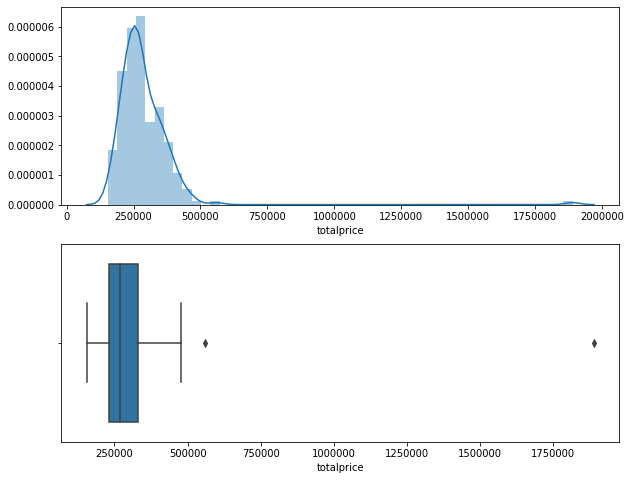

In [15]:
# Analisis Univariate
# Total Price
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['totalprice'])

f.add_subplot(2,1,2)
sns.boxplot(df['totalprice'])

**Univariate Analysis** <br>
- Pada visualisasi plot distribusi totalprice dapat dilihat bahwa harga apartemen berada pada kisaran 250.000
- Dari 218 apartemen terdapat 2 apartemen dengan harga yang jauh lebih mahal daripada apartemen pada umumnya, yaitu sekitar 600.000 dan 1.800.000

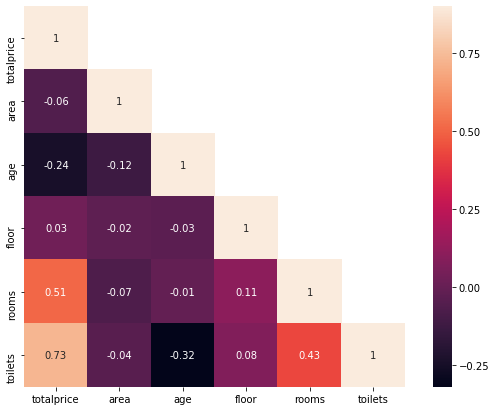

In [32]:
# Korelasi antar features
corr = df.corr(method = 'spearman').round(2)

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (8,5))
fig.set_size_inches(10,7)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Korelasi** <br>
Dari korelasi tersebut dapat dilihat bahwa features yang memiliki hubungan paling tinggi dengan dengan total price adalah:
- Korelasi totalprice dengan toilets yaitu 0.73 (tinggi)
- Korelasi totalprice dengan rooms yaitu 0.51 (cukup tinggi)

<br>
Maka dapat dikatakan bahwa totalprice memiliki kedekatan yang cukup tinggi dengan toilets dan rooms. Sehingga dapat dikatakan bahwa penentuan harga apartemen akan optimal jika dipengaruhi oleh banyaknya toilet dan dan ruangan yang terdapat pada apartemen tersebut. Dengan nilai korelasi positif maka dapat diartikan bahwa semakin banyaknya jumlah toilet dan ruangan pada apartemen maka harga apartemen akan semakin mahal.

Namun di luar korelasi totalprice terdapat korelasi fetures lainnya yang dapat dikatakan cukup tinggi, yaitu:
- Korelasi toilets dengan rooms yaitu 0.43 (sedang)

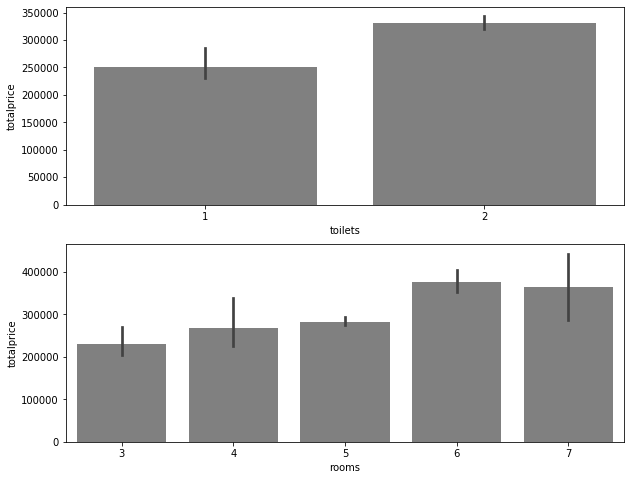

In [33]:
# Bivariate Analysis

f = plt.figure(figsize=(10,8))

# totalprice vs. toilets
f.add_subplot(2,1,1)
sns.barplot(data=df,
            x=df['toilets'],
            y=df['totalprice'],
            color='grey')

# totalprice vs. garage
f.add_subplot(2,1,2)
sns.barplot(data=df,
            x=df['rooms'],
            y=df['totalprice'],
            color='grey')

**Bivariate Analysis**
- Dapat dikatakan bahwa semakin banyak jumlah toilet dan ruangan pada apartemen maka akan memberikan dampak semakin mahal harga apartemen yang ditawarkan.

### No. 4 -- Features Selection

- Saya akan memilih variabel dengan type data numerik karena model machine learning hanya menerima type data yang berbentuk numerik.
- Terkecuali conservation yang akan saya rubah ke dalam bentuk numerikal.

In [18]:
# Mengubah nilai conservation
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
df['conservation'] = df['conservation'].replace(dicti)

In [29]:
# Mengubah conservation menjadi variabel categorical
df['conservation'] = df['conservation'].astype(str)

In [36]:
# Duplicate dataset ke dalam dataframe baru
new_df = df.copy()
new_df.head()

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
row.labels,,,,,,,,,,,,,,,
1,228000,7530999756,Z45,4B,33,3,5,E100,3,1,0,1,S3,3A,0
2,409000,1006500015,Z31,3B,5,7,5,E50,1,2,1,1,S5,4A,1
3,200000,8887000275,Z52,3A,14,8,5,E50,1,2,0,1,S2,3A,0
4,180000,6261000061,Z62,4A,41,3,4,E50,2,1,0,0,S3,1A,0
5,443600,1461499939,Z31,3A,22,6,7,E100,1,2,0,1,S4,4A,1


In [37]:
# Menghapus kolom yang tidak perlu
drop = ['zone', 'category', 'out', 'streetcategory', 'heating']
new_df.drop(columns=drop, inplace=True)
new_df.head()

,totalprice,area,age,floor,rooms,conservation,toilets,garage,elevator,tras
row.labels,,,,,,,,,,
1,228000,7530999756,33,3,5,3,1,0,1,0
2,409000,1006500015,5,7,5,1,2,1,1,1
3,200000,8887000275,14,8,5,1,2,0,1,0
4,180000,6261000061,41,3,4,2,1,0,0,0
5,443600,1461499939,22,6,7,1,2,0,1,1


In [38]:
# Membuat one hot encoding
new_df['conservation'] = pd.Categorical(new_df['conservation'])
new_df = pd.get_dummies(new_df)
new_df.head()

,totalprice,area,age,floor,rooms,toilets,conservation_1,conservation_2,conservation_3,garage_0,garage_1,garage_2,elevator_0,elevator_1,tras_0,tras_1,tras_2
row.labels,,,,,,,,,,,,,,,,,
1,228000,7530999756,33,3,5,1,0,0,1,1,0,0,0,1,1,0,0
2,409000,1006500015,5,7,5,2,1,0,0,0,1,0,0,1,0,1,0
3,200000,8887000275,14,8,5,2,1,0,0,1,0,0,0,1,1,0,0
4,180000,6261000061,41,3,4,1,0,1,0,1,0,0,1,0,1,0,0
5,443600,1461499939,22,6,7,2,1,0,0,1,0,0,0,1,0,1,0


## 5. Modelling

In [48]:
# Memakai Linear regression
lin_reg = LinearRegression()

In [49]:
# Menentukan variabel x dan y
x = new_df.drop(columns = ['totalprice'])
y = new_df['totalprice']

In [50]:
# Split dataset
# dengan proporsi train 70% dan test 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [51]:
# Training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Melakukan prediksi
y_pred = lin_reg.predict(x_test)

In [53]:
# Mendefinisikan MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
# Melihat nilai akurasi model regresi linier dengan menggunakan MAE dan MAPE
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)}')

Nilai MAE 55504.0713541355
Nilai MAPE 12.032971345621583


- Harga memiliki error sebesar 55.504 dengan nilai MAPE sebesar 12%

**Conclusion** <br>
Dari nilai MAPE tersebut dapat dikatakan bahwa model linier regresi dari total price yang ditentukan dari features terpilih dapat memberikan nilai harga apartemen dengan baik dan representatif.